In [2]:
df = pd.read_csv("Warehouse_and_Retail_Sales.csv")
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,BOSTON BEER CORPORATION,98868,SAM ADAMS OCTOBERFEST 1/6K,KEGS,0.00,0.0,54.0
307641,2020,9,GLOBAL OCEAN AND AIR CARGO SERVICES,98884,HARAR BEER 4/6NR - 11.2OZ,BEER,1.50,1.0,8.0
307642,2020,9,HEINEKEN USA,98906,DOS EQUIS LAGER 1/2K,KEGS,0.00,0.0,22.0
307643,2020,9,RELIABLE CHURCHILL LLLP,98914,LINDEMANS KRIEK NR - 25.4OZ,BEER,0.00,0.0,4.0


In [3]:
df.head(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [5]:
df['ITEM DESCRIPTION'].value_counts()

ITEM DESCRIPTION
BURGANS ALBARINO - 750ML                         44
SANTA JULIA TORRONTES SUSTAINABLE - 750ML        39
LA VIELLE FERME CDV RED - 750ML                  35
LINGANORE BLACK RAVEN - 750ML                    34
MCCLINTOCK HERITAGE WHITE WHISKEY - 750ML        33
                                                 ..
LEFT HAND WARRIOR - 1/6K                          1
DINKELACKER OKTOBERFEST MARZEN 4/6NR - 11.2OZ     1
OTTER CREEK BACKSEAT BURNER IPA 1/2 KEG           1
SONOMA CIDER DRY ZIDER - 22.0Z                    1
SANDPIPER CHARDONNAY - 750ML                      1
Name: count, Length: 34822, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['RETAIL SALES'].value_counts()

RETAIL SALES
0.00      121702
0.08       10664
0.17        6819
0.16        6091
0.24        3921
           ...  
111.81         1
106.80         1
122.37         1
164.39         1
204.70         1
Name: count, Length: 10674, dtype: int64

In [8]:
df = df[df['RETAIL SALES']>0]

In [9]:
df.head(4)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0


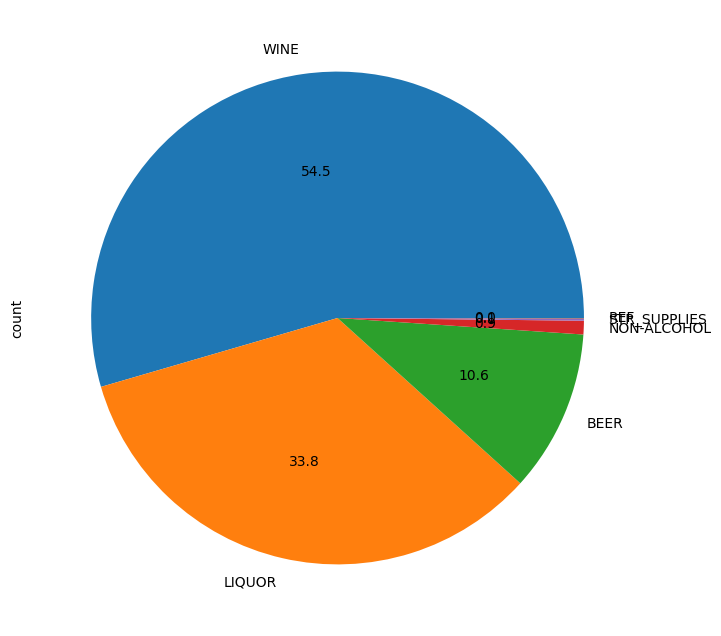

In [10]:
item_vriety = df['ITEM TYPE'].value_counts()

plt.figure(figsize=(50, 8))
item_vriety.plot(kind='pie', autopct='%.1f')

plt.show()

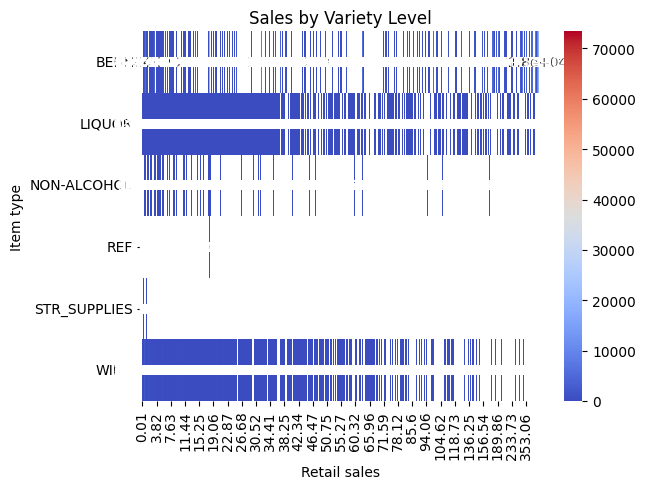

In [11]:
crosstab_result = pd.crosstab(df['ITEM TYPE'], df['RETAIL SALES'], values=df['WAREHOUSE SALES'], aggfunc='sum')


sns.heatmap(crosstab_result, cmap='coolwarm', annot=True)
plt.title('Sales by Variety Level')
plt.xlabel('Retail sales')
plt.ylabel('Item type')

plt.show()